In [ ]:
import re
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Activation,Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten,GlobalMaxPooling1D,Conv1D, Embedding, LSTM

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
#drive.mount('/content/drive')
drive.mount('/content/drive', force_remount=True)


# Veri setini yükle
#file_path = '/content/drive/My Drive/sentiment analysis/final_df.csv'
file_path = '/content/drive/My Drive/BitirmeMuammer/imdb/IMDB_Dataset.csv'
file_path2 = '/content/drive/My Drive/BitirmeMuammer/imdb/final_df_balanced.csv'
file_path3 = '/content/drive/My Drive/BitirmeMuammer/Proje/twitter_racism_parsed_dataset.csv'
df = pd.read_csv(file_path3, encoding='latin1', header=None)

# Sütun isimlerini belirle
df.columns = ['index', 'id','Text','label','score']

# İlk sütunu kontrol edelim
print("Sütun isimleri:", df.columns)

Mounted at /content/drive
Sütun isimleri: Index(['index', 'id', 'Text', 'label', 'score'], dtype='object')


In [ ]:
df = df.drop(df.index[0])

In [ ]:
df.head()

,index,id,Text,label,score
1,5.77E+17,5.77E+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
2,5.41E+17,5.41E+17,#NULL!,none,0
3,5.68E+17,5.68E+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
4,5.77E+17,5.77E+17,"Finally I'm all caught up, and that sudden dea...",none,0
5,5.71E+17,5.71E+17,@carolinesinders @herecomesfran *hugs*,none,0


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 1 to 13471
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   13471 non-null  object
 1   id      13471 non-null  object
 2   Text    13471 non-null  object
 3   label   13471 non-null  object
 4   score   13471 non-null  object
dtypes: object(5)
memory usage: 526.3+ KB


>Checking for null values:

In [ ]:
df.isnull().sum()

,0
index,0
id,0
Text,0
label,0
score,0


In [ ]:
df["sentiment"]=df['score']

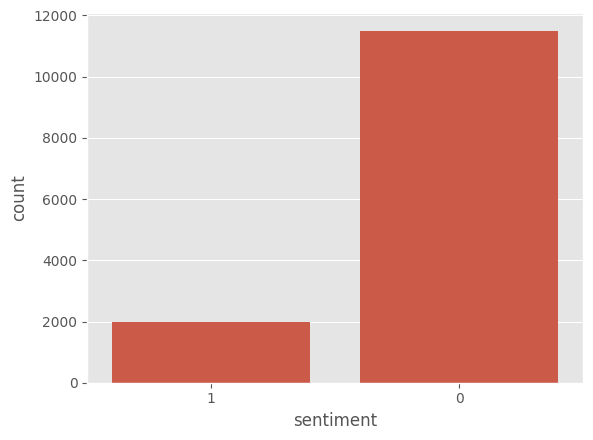

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
sns.countplot(data = df, x = df["sentiment"])
plt.show()

In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
0,11501
1,1970


- So, there is no class imbalance both class has an equal number of data.

In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
import en_core_web_sm
# Gerekli kaynakları indir
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopwords_list = set(stopwords.words('english'))


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


class CustomPreprocess():

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        sen = sen.lower()

        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)

        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)

        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)

        return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
custom = CustomPreprocess()
custom.preprocess_text("I thought this was a wonderful way to spend time on a too hot summer weekend")

'thought wonderful way spend time hot summer weekend'

In [ ]:
x = []
sentences = list(df['review'])
for sen in sentences:
    x.append(custom.preprocess_text(sen))

In [ ]:
x = []
sentences = list(df['Text'])
for sen in sentences:
    x.append(custom.preprocess_text(sen))

In [ ]:
y=df['score']
y

,score
1,1
2,0
3,1
4,0
5,0
...,...
13467,0
13468,0
13469,0
13470,0


In [ ]:
"""y = df['sentiment']
sentiment_map = {'negative' : 0, 'positive': 1}
y = np.array(y.map(sentiment_map))
y[:15]"""

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
vocab_length = len(tokenizer.word_index)+1
vocab_length

18188

In [ ]:
maxlen = 100

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [ ]:
x_train

array([[  36,    1, 1923, ...,    0,    0,    0],
       [1444,  300,   81, ...,    0,    0,    0],
       [ 996,  695, 1131, ...,    0,    0,    0],
       ...,
       [5196, 5197, 4049, ...,    0,    0,    0],
       [2002,  182,   71, ...,    0,    0,    0],
       [   4, 7736,    1, ...,    0,    0,    0]], dtype=int32)

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')
"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# GloVe dosya yolu (Google Drive'daki konum)
glove_path = "/content/drive/My Drive/BitirmeMuammer/imdb/glove.6B.100d.txt"

# Embedding sözlüğünü oluşturma
embeddings_dictionary = dict()
with open(glove_path, encoding='utf8') as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions


In [ ]:
print(list(tokenizer.word_index.items())[:15])

[('mkr', 1), ('co', 2), ('http', 3), ('rt', 4), ('islam', 5), ('like', 6), ('kat', 7), ('people', 8), ('amp', 9), ('one', 10), ('get', 11), ('andre', 12), ('isis', 13), ('muslims', 14), ('women', 15)]


In [ ]:
embeddings_dictionary.get('racism')

array([ 0.52482 ,  0.92071 ,  0.29836 , -0.24124 , -0.5652  ,  1.0325  ,
       -0.060148, -0.24022 ,  0.069834,  0.16841 , -0.76861 , -0.23317 ,
       -0.44671 ,  0.19925 ,  0.71842 ,  0.51229 , -0.23303 , -0.11615 ,
       -0.89179 , -0.49155 ,  0.2149  ,  0.093279,  0.28796 , -0.19713 ,
        0.45631 , -0.44314 ,  0.53871 , -0.50102 , -0.007563, -0.31464 ,
       -0.29453 ,  0.30115 , -0.27794 ,  0.85528 ,  0.015329, -0.16251 ,
        0.19771 , -0.33963 ,  0.059508,  0.68943 , -1.6598  ,  0.014561,
       -0.35908 , -0.19133 , -0.50493 , -0.40671 ,  0.95197 ,  0.55459 ,
       -1.0215  , -0.85605 ,  0.38862 ,  0.45444 , -0.85431 ,  0.84264 ,
       -0.31534 , -0.74486 ,  0.059826,  0.14559 ,  0.56547 , -0.21613 ,
       -0.098569, -0.11489 , -0.28024 , -0.88933 ,  0.45054 , -0.10471 ,
        0.935   , -0.26769 ,  0.21306 , -0.38921 ,  0.57451 , -0.46571 ,
       -0.76107 , -0.11482 ,  0.041606, -0.019375, -0.029905,  0.27339 ,
       -1.3467  ,  0.55837 , -0.45772 , -0.2066  , 

In [ ]:
embedding_matrix = np.zeros((vocab_length, 100)) #100
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(18188, 100)

> Model Building:
>> Convenitonal Neural Network:

In [ ]:
from keras.layers import Conv1D
cnn = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
cnn.add(embedding_layer)
cnn.add(Conv1D(128,5,activation = 'relu'))
cnn.add(Dropout(0.2))

cnn.add(Conv1D(256,5,activation = 'relu'))
cnn.add(GlobalMaxPooling1D())

cnn.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,818,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,818,800 (6.94 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,818,800 (6.94 MB)

In [ ]:
x_train

array([[  36,    1, 1923, ...,    0,    0,    0],
       [1444,  300,   81, ...,    0,    0,    0],
       [ 996,  695, 1131, ...,    0,    0,    0],
       ...,
       [5196, 5197, 4049, ...,    0,    0,    0],
       [2002,  182,   71, ...,    0,    0,    0],
       [   4, 7736,    1, ...,    0,    0,    0]], dtype=int32)

In [ ]:
print(type(x_train), x_train.dtype)
print(type(y_train), y_train.dtype)


<class 'numpy.ndarray'> int32
<class 'pandas.core.series.Series'> object


In [ ]:
import numpy as np

# Pandas Series'i NumPy array'e çevir ve uygun tipe dönüştür
y_train = y_train.to_numpy().astype('int32')  # veya float32, modele göre değişir
y_test = y_test.to_numpy().astype('int32')

In [ ]:
history_cnn = cnn.fit(x_train,y_train, batch_size=128, epochs = 10,
                      verbose=1, validation_split =0.2)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 31s 410ms/step - accuracy: 0.8881 - loss: 0.2980 - val_accuracy: 0.9193 - val_loss: 0.1987
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - accuracy: 0.9255 - loss: 0.1826 - val_accuracy: 0.9216 - val_loss: 0.1779
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 44s 462ms/step - accuracy: 0.9385 - loss: 0.1536 - val_accuracy: 0.9239 - val_loss: 0.1778
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 38s 420ms/step - accuracy: 0.9516 - loss: 0.1277 - val_accuracy: 0.9290 - val_loss: 0.1791
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 28s 406ms/step - accuracy: 0.9625 - loss: 0.1042 - val_accuracy: 0.9276 - val_loss: 0.1908
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 43s 445ms/step - accuracy: 0.9718 - loss: 0.0826 - val_accuracy: 0.9272 - val_loss: 0.2010
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 37s 391ms/step - accuracy: 0.9838 - loss: 0.0547 - val_accuracy: 0.9281 - val_loss: 0.2086
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 391ms/step - accuracy: 0.9901 - loss: 0.0400 - val_accu

In [ ]:
history_cnn = cnn.fit(x_train,y_train, batch_size=128, epochs = 50,
                      verbose=1, validation_split =0.2)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 29s 428ms/step - accuracy: 0.9958 - loss: 0.0190 - val_accuracy: 0.9244 - val_loss: 0.2656
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 40s 412ms/step - accuracy: 0.9982 - loss: 0.0116 - val_accuracy: 0.9272 - val_loss: 0.2713
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.9950 - loss: 0.0195 - val_accuracy: 0.9244 - val_loss: 0.2917
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.9968 - loss: 0.0115 - val_accuracy: 0.9304 - val_loss: 0.2863
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 393ms/step - accuracy: 0.9984 - loss: 0.0085 - val_accuracy: 0.9300 - val_loss: 0.3358
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 44s 435ms/step - accuracy: 0.9968 - loss: 0.0117 - val_accuracy: 0.9281 - val_loss: 0.3297
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 39s 407ms/step - accuracy: 0.9988 - loss: 0.0068 - val_accuracy: 0.9281 - val_loss: 0.3375
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 40s 393ms/step - accuracy: 0.9985 - loss: 0.0070 - val_accu

In [ ]:
cnn_result = cnn.evaluate(x_test,y_test, verbose = 1)
print("Test Accuracy:", cnn_result[1])
print("Test Loss:", cnn_result[0])

85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9075 - loss: 0.5476
Test Accuracy: 0.9098330140113831
Test Loss: 0.5491321682929993


In [ ]:
y_pred = cnn.predict(x_test)  # cnn_result değil!
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2295
           1       0.00      0.00      0.00       400

    accuracy                           0.85      2695
   macro avg       0.43      0.50      0.46      2695
weighted avg       0.73      0.85      0.78      2695



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: x and y must have same first dimension, but have shapes (10,) and (50,)

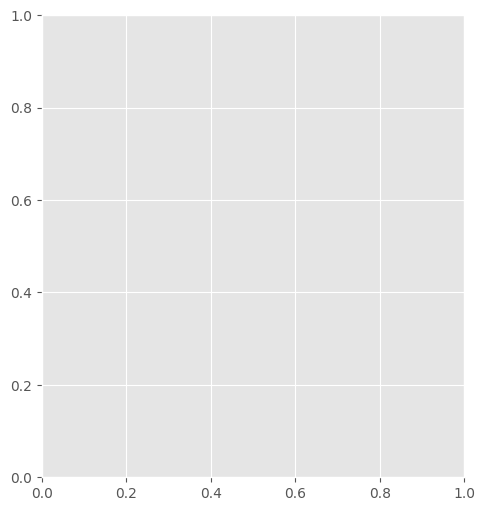

In [ ]:
plt.figure(figsize=(12,6))
epochs = range(1,11)
plt.subplot(1,2,1)
plt.plot(epochs,history_cnn.history["accuracy"],color = 'green', marker = 'o')
plt.plot(epochs,history_cnn.history["val_accuracy"],color = 'red', marker = 'o')
plt.title("Model Accuracy")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Accuracy",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_cnn.history["loss"],color = 'green', marker = 'o')
plt.plot(epochs,history_cnn.history["val_loss"],color = 'red', marker = 'o')
plt.title("Model Loss")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Loss",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

> LSTM

In [ ]:
lstm = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlen, trainable = False)
lstm.add(embedding_layer)
lstm.add(LSTM(256)) #return_sequences=True
# lstm.add(LSTM(128, return_sequences=True))

# lstm.add(Dropout(0.2))
# lstm.add(LSTM(64))


# cnn.add(Conv1D(512,5,activation = 'relu'))
# cnn.add(GlobalMaxPooling1D())

lstm.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
lstm.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     1,818,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,818,800 (6.94 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,818,800 (6.94 MB)

In [ ]:
history_lstm = lstm.fit(x_train,y_train, batch_size=128, epochs = 100,
                      verbose=1, validation_split =0.2)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 64s 901ms/step - accuracy: 0.8514 - loss: 0.4379 - val_accuracy: 0.8590 - val_loss: 0.2354
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 80s 873ms/step - accuracy: 0.8871 - loss: 0.2673 - val_accuracy: 0.8915 - val_loss: 0.2360
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 86s 936ms/step - accuracy: 0.8783 - loss: 0.2627 - val_accuracy: 0.9142 - val_loss: 0.2202
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 77s 863ms/step - accuracy: 0.8856 - loss: 0.2430 - val_accuracy: 0.8776 - val_loss: 0.2295
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 86s 924ms/step - accuracy: 0.8668 - loss: 0.2841 - val_accuracy: 0.8687 - val_loss: 0.3877
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 79s 883ms/step - accuracy: 0.8521 - loss: 0.4195 - val_accuracy: 0.8697 - val_loss: 0.3879
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 81s 870ms/step - accuracy: 0.8466 - loss: 0.4304 - val_accuracy: 0.8697 - val_loss: 0.3941
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 82s 873ms/step - accuracy: 0.8541 - loss: 0.4185 - 

In [ ]:
lstm_result = lstm.evaluate(x_test,y_test, verbose = 1)
print("Test Accuracy:", lstm_result[1])
print("Test Loss:", lstm_result[0])

85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.8600 - loss: 0.4059
Test Accuracy: 0.8515769839286804
Test Loss: 0.4202830493450165


In [ ]:
y_pred = lstm.predict(x_test)  # cnn_result değil!
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)


85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2295
           1       0.00      0.00      0.00       400

    accuracy                           0.85      2695
   macro avg       0.43      0.50      0.46      2695
weighted avg       0.73      0.85      0.78      2695



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

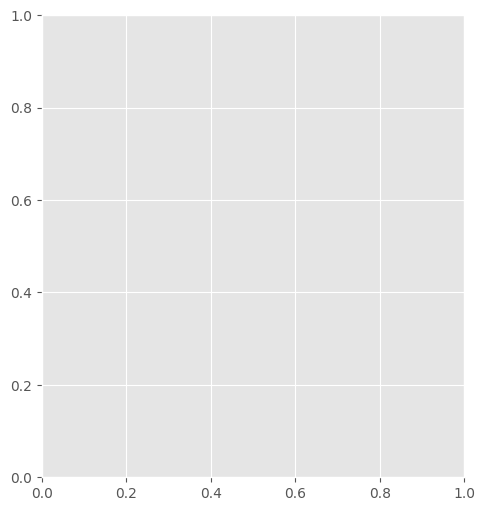

In [ ]:
plt.figure(figsize=(12,6))
epochs = range(1, 11)
plt.subplot(1,2,1)
plt.plot(epochs,history_lstm.history["accuracy"],color = 'green', marker = 'o')
plt.plot(epochs,history_lstm.history["val_accuracy"],color = 'red', marker = 'o')
plt.title("Model Accuracy")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Accuracy",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_lstm.history["loss"],color = 'green', marker = 'o')
plt.plot(epochs,history_lstm.history["val_loss"],color = 'red', marker = 'o')
plt.title("Model Loss")
plt.xlabel("Epochs",color = 'black')
plt.ylabel("Loss",color = 'black')
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [ ]:
lstm.save("sentiment_classifier2.h5")

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model parametreleri
embedding_dim = 100
lstm_units = 512
dropout_rate = 0.5
activation_fn = 'tanh'
learning_rate = 0.002
batch_size = 256
epochs = 10

# Bi-LSTM modeli
model = Sequential()
model.add(Embedding(input_dim=vocab_length, output_dim=embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(units=lstm_units, activation=activation_fn, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='sigmoid'))

# Derleme
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Eğitim
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 408s 12s/step - accuracy: 0.7988 - loss: 0.4679 - val_accuracy: 0.8697 - val_loss: 0.3738
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 439s 12s/step - accuracy: 0.9346 - loss: 0.1833 - val_accuracy: 0.1303 - val_loss: 2.5851
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 439s 12s/step - accuracy: 0.9752 - loss: 0.0761 - val_accuracy: 0.8697 - val_loss: 0.3639
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 442s 12s/step - accuracy: 0.9857 - loss: 0.0412 - val_accuracy: 0.8697 - val_loss: 0.3255


In [ ]:
model.save("iRacism_hibrit.h5")

In [ ]:
# Model özeti
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 100)       │     1,818,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1024)           │     2,510,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,000,213 (49.59 MB)

 Trainable params: 4,332,721 (16.53 MB)

 Non-trainable params: 2,048 (8.00 KB)

 Optimizer params: 8,665,444 (33.06 MB)

85/85 ━━━━━━━━━━━━━━━━━━━━ 54s 633ms/step


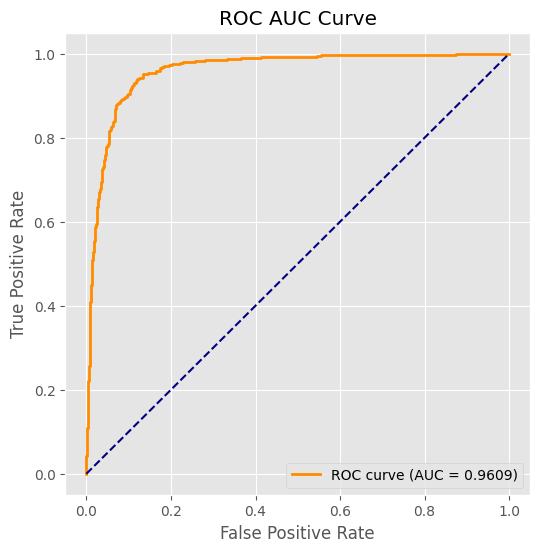

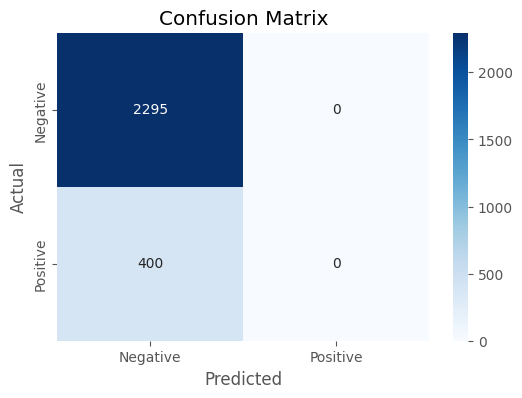

📌 Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      1.00      0.92      2295
    Positive       0.00      0.00      0.00       400

    accuracy                           0.85      2695
   macro avg       0.43      0.50      0.46      2695
weighted avg       0.73      0.85      0.78      2695



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


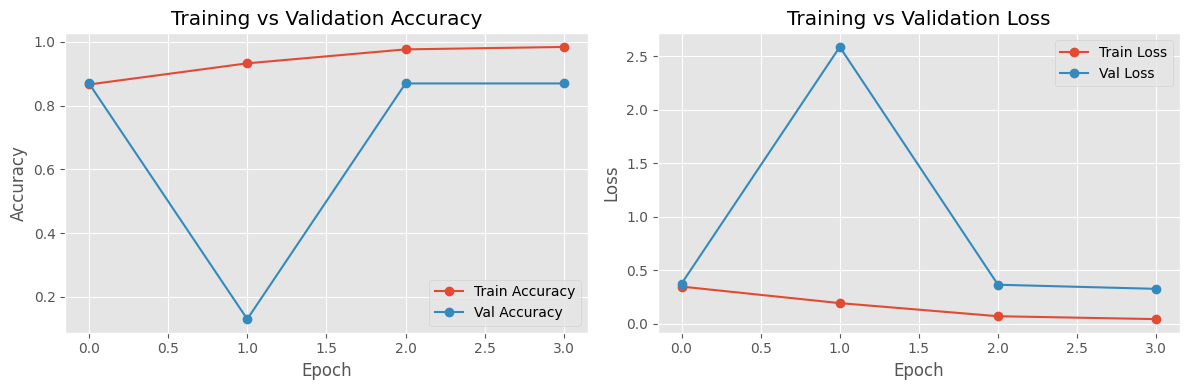

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Tahmin ve sınıflandırma ---
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# --- 2. ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- 3. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- 4. Classification Report ---
print("📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# --- 5. Accuracy ve Loss Grafikleri ---
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


##[GNN](#b2)

In [ ]:
# PyTorch Geometric için gerekli temel kütüphaneler
!pip install -q torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.0.0+cu118.html


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.5/886.5 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00


In [ ]:
import torch
print(torch.__version__)

2.6.0+cu124


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

class GNN_LSTM_Model(nn.Module):
    def __init__(self, vocab_size, embedding_matrix, embedding_dim, hidden_dim, num_classes):
        super(GNN_LSTM_Model, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
        self.embedding.weight.requires_grad = False  # Freeze the embedding layer

        # Graph Convolutional Network layer
        self.gcn1 = GCNConv(embedding_dim, hidden_dim)
        self.gcn2 = GCNConv(hidden_dim, hidden_dim)

        # LSTM layer
        self.lstm = nn.LSTM(hidden_dim, 256)

        # Final dense layer for sentiment classification
        self.fc = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x, edge_index):
        # Apply embedding layer
        x = self.embedding(x)

        # Apply GCN layers
        x = self.gcn1(x, edge_index)
        x = F.relu(x)
        x = self.gcn2(x, edge_index)
        x = F.relu(x)

        # LSTM layer
        x, (hn, cn) = self.lstm(x)

        # Output layer
        x = self.fc(x[-1, :, :])

        return F.sigmoid(x)


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

In [ ]:
vocab_size = 10000
embedding_dim = 100
embedding_matrix = np.random.rand(vocab_size, embedding_dim)  # Sadece örnek amaçlı rastgele
max_len = 100
num_classes = 1  # Binary classification


In [ ]:
#vocab_size = embedding_matrix.shape[0]  # Bu 10000 olmalı


In [ ]:
#vocab_size = max([max(seq) for seq in x_train]) + 1  # En büyük index + 1



In [ ]:
"""# Num_words filtresine göre tüm veriyi tekrar işle
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# max(index) < 10000 garantisi için yeniden işle
x_data = [[token if token < 10000 else 1 for token in seq] for seq in sequences]
"""

NameError: name 'texts' is not defined

In [ ]:
# 10,000'den büyük token indekslerini 1 (OOV token) yap
x_train = [[token if token < 10000 else 1 for token in seq] for seq in x_train]
x_test = [[token if token < 10000 else 1 for token in seq] for seq in x_test]




In [ ]:
import numpy as np

# Eğer x_train ve y_train liste olarak geliyorsa:
x_train = np.array(x_train)
y_train = np.array(y_train)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model tanımı
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model_GRU.add(GRU(units=128, return_sequences=False))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(units=num_classes, activation='sigmoid'))  # binary classification için

# Derleme
model_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping tanımı
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Eğitim
history = model_GRU.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 868ms/step - accuracy: 0.8117 - loss: 0.4926 - val_accuracy: 0.8697 - val_loss: 0.3924
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 641ms/step - accuracy: 0.8499 - loss: 0.4326 - val_accuracy: 0.8697 - val_loss: 0.3893
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 742ms/step - accuracy: 0.8418 - loss: 0.4424 - val_accuracy: 0.8697 - val_loss: 0.3902
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 721ms/step - accuracy: 0.8547 - loss: 0.4210 - val_accuracy: 0.8697 - val_loss: 0.3880
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 714ms/step - accuracy: 0.8477 - loss: 0.4309 - val_accuracy: 0.8697 - val_loss: 0.3903
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 650ms/step - accuracy: 0.8500 - loss: 0.4272 - val_accuracy: 0.8697 - val_loss: 0.3870
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 729ms/step - accuracy: 0.8467 - loss: 0.4354 - val_accuracy: 0.8697 - val_loss: 0.3871
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 728ms/step - accuracy: 0.8527 - loss: 0.4220 - val_accu

##[Simple RNN](#b2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

rnn = Sequential()

# Embedding katmanı (önceden eğitilmiş embedding matrisi ile)
embedding_layer = Embedding(
    input_dim=vocab_length,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False
)

rnn.add(embedding_layer)

# Simple RNN katmanı
rnn.add(SimpleRNN(128))  # 128 hücreli RNN katmanı

# Sonuç katmanı
rnn.add(Dense(1, activation='sigmoid'))  # Binary classification (duygu analizi)

# Derleme
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

model = Sequential()

# Embedding katmanı
model.add(Embedding(
    input_dim=vocab_length,
    output_dim=100,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False
))

# GRU katmanı
model.add(GRU(128))

# Çıkış katmanıa
model.add(Dense(1, activation='sigmoid'))

# Modeli derle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


##Kaydetme-Tekrar yükleme ve notlar

In [ ]:
lstm.save("sentiment_classifier2.h5")
"""komutu, Keras/TensorFlow modelinizi HDF5 (H5) formatında diske kaydeder. Bu, modelin:
Mimarisini
Ağırlıklarını
Eğitim durumunu (optimizer, loss, metrikler)
bir dosyada saklar."""

In [ ]:
import os
print(os.getcwd())
"""Bu kod, .h5 dosyasının nereye kaydedildiğini görmenizi sağlar (çalışma dizinini verir)."""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Kaydetme
lstm.save('/content/drive/MyDrive/sentiment_classifier2.h5')


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("sentiment_classifier2.h5")
"""Kaydedilen modeli daha sonra bu şekilde yükleyebilirsiniz:"""

In [ ]:
#1. Google Drive'ı Bağla
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#2. Modeli Drive’a Kaydet
# Modeli belirli bir klasöre kaydet (örneğin MyDrive altına)
lstm.save('/content/drive/MyDrive/sentiment_classifier2.h5')
#Modeli yeniden eğittikten sonra tekrar .save() ile üzerine yazabilirsin.


In [ ]:
#3. Daha Sonra Drive'dan Yükle
from tensorflow.keras.models import load_model

# Modeli Drive'dan yükle
model = load_model('/content/drive/MyDrive/sentiment_classifier2.h5')

# Artık model ile tahmin yapabilirsin
# örnek: model.predict(x_test)
